In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from haversine import haversine, Unit
pd.set_option('display.max_columns', None)

In [48]:
stream_df = pd.read_pickle(os.path.join('..','data','processed','stream_processed.pkl'),compression='zip')
stream_df.head()

measurement_location,Datum,15202300,15205501,15207507,15210206,15212008,15212700,15213500,15214003,15214604,15216009,15217908,15221009,15228008,15241006,15242304,15243001,15246000,15247002,15247501
0,2014-01-01,14.4,17.2,19.8,3.87,8.66,9.66,0.433,2.35,0.207,1.66,0.921,0.671,2.59,0.253,0.870,1.26,2.35,0.355,0.120
1,2014-01-02,14.4,17.0,19.3,3.78,8.52,9.46,0.435,2.51,0.204,1.62,0.909,0.664,2.57,0.253,0.870,1.23,2.32,0.361,0.131
2,2014-01-03,14.1,16.6,19.3,3.78,8.40,9.42,0.429,2.61,0.201,1.60,0.907,0.641,2.58,0.253,0.871,1.23,2.30,0.362,0.130
3,2014-01-04,14.2,16.6,19.3,3.84,8.57,9.50,0.445,2.49,0.214,1.64,0.935,0.642,2.60,0.256,0.929,1.26,2.44,0.382,0.127
4,2014-01-05,16.4,18.4,20.6,4.36,9.94,10.80,0.545,2.86,0.267,1.80,1.130,0.690,3.10,0.300,1.150,1.61,3.14,0.561,0.175


In [87]:
meteo_df = pd.read_pickle(os.path.join('..','data','processed','meteo_processed.pkl'),compression='zip')
meteo_df = meteo_df.iloc[2:]
meteo_df = meteo_df.set_index('date')

In [50]:
rolling_df = stream_df
rolling_df['Datum'] = pd.to_datetime(rolling_df['Datum'])
rolling_df[list(stream_df.columns[1:])] = stream_df[list(stream_df.columns[1:])].rolling(window=3).mean()
rolling_df = rolling_df.dropna().iloc[:-1]
rolling_df = rolling_df.set_index('Datum')
rolling_df

measurement_location,15202300,15205501,15207507,15210206,15212008,15212700,15213500,15214003,15214604,15216009,15217908,15221009,15228008,15241006,15242304,15243001,15246000,15247002,15247501
Datum,,,,,,,,,,,,,,,,,,,
2014-01-03,14.300000,16.933333,19.466667,3.810000,8.526667,9.513333,0.432333,2.490000,0.204000,1.626667,0.912333,0.658667,2.580000,0.253000,0.870333,1.240000,2.323333,0.359333,0.127000
2014-01-04,14.233333,16.733333,19.300000,3.800000,8.496667,9.460000,0.436333,2.536667,0.206333,1.620000,0.917000,0.649000,2.583333,0.254000,0.890000,1.240000,2.353333,0.368333,0.129333
2014-01-05,14.900000,17.200000,19.733333,3.993333,8.970000,9.906667,0.473000,2.653333,0.227333,1.680000,0.990667,0.657667,2.760000,0.269667,0.983333,1.366667,2.626667,0.435000,0.144000
2014-01-06,16.300000,18.800000,21.433333,4.193333,9.736667,10.600000,0.504667,2.740000,0.239333,1.740000,1.061667,0.670667,2.900000,0.281000,1.056333,1.476667,2.866667,0.477000,0.152667
2014-01-07,16.733333,19.800000,22.966667,4.260000,10.083333,10.900000,0.515333,2.776667,0.241000,1.750000,1.086667,0.670667,2.930000,0.286667,1.083333,1.540000,2.963333,0.493333,0.156000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,139.733333,211.000000,240.000000,45.500000,79.500000,100.166667,3.023333,32.000000,2.451000,12.270000,9.693333,7.713333,21.700000,1.484667,7.530000,19.966667,23.933333,3.910000,1.762000
2023-12-28,100.966667,150.000000,172.666667,33.833333,56.900000,71.533333,2.296667,22.633333,1.164667,10.370000,7.316667,5.253333,15.633333,1.023333,4.453333,13.850000,17.433333,2.633333,1.035667
2023-12-29,82.100000,107.500000,126.233333,29.033333,47.366667,58.733333,1.940000,18.133333,0.838333,10.020000,6.206667,4.116667,12.666667,0.804333,3.386667,10.293333,13.023333,2.100000,0.772000


In [76]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(rolling_df),columns= list(stream_df.columns[1:]),index = rolling_df.index)
scaled_df

,15202300,15205501,15207507,15210206,15212008,15212700,15213500,15214003,15214604,15216009,15217908,15221009,15228008,15241006,15242304,15243001,15246000,15247002,15247501
Datum,,,,,,,,,,,,,,,,,,,
2014-01-03,0.040191,0.041989,0.042342,0.037322,0.066922,0.047145,0.030829,0.035445,0.025487,0.055002,0.025213,0.042860,0.046015,0.021389,0.034805,0.028402,0.044152,0.026943,0.024790
2014-01-04,0.039890,0.041261,0.041751,0.037173,0.066696,0.046830,0.031359,0.036443,0.026001,0.054612,0.025431,0.041944,0.046115,0.021527,0.035946,0.028402,0.044814,0.027942,0.025361
2014-01-05,0.042899,0.042960,0.043287,0.040052,0.070263,0.049466,0.036217,0.038937,0.030628,0.058118,0.028886,0.042766,0.051429,0.023684,0.041364,0.031929,0.050851,0.035344,0.028949
2014-01-06,0.049216,0.048787,0.049312,0.043029,0.076041,0.053557,0.040413,0.040790,0.033272,0.061624,0.032215,0.043997,0.055639,0.025244,0.045601,0.034992,0.056152,0.040007,0.031069
2014-01-07,0.051172,0.052428,0.054747,0.044022,0.078654,0.055327,0.041827,0.041574,0.033639,0.062208,0.033388,0.043997,0.056541,0.026025,0.047168,0.036755,0.058287,0.041821,0.031885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.606209,0.748722,0.823969,0.658048,0.601818,0.582047,0.374144,0.666436,0.520602,0.676885,0.436976,0.711317,0.621053,0.190985,0.421336,0.549842,0.521450,0.421170,0.424774
2023-12-28,0.431275,0.526578,0.585322,0.484342,0.431491,0.413095,0.277859,0.466155,0.237165,0.565869,0.325528,0.478222,0.438596,0.127461,0.242764,0.379525,0.377885,0.279423,0.247085
2023-12-29,0.346139,0.371806,0.420750,0.412874,0.359643,0.337569,0.230599,0.369935,0.165259,0.545419,0.273478,0.370519,0.349373,0.097306,0.180854,0.280490,0.280482,0.220207,0.182582


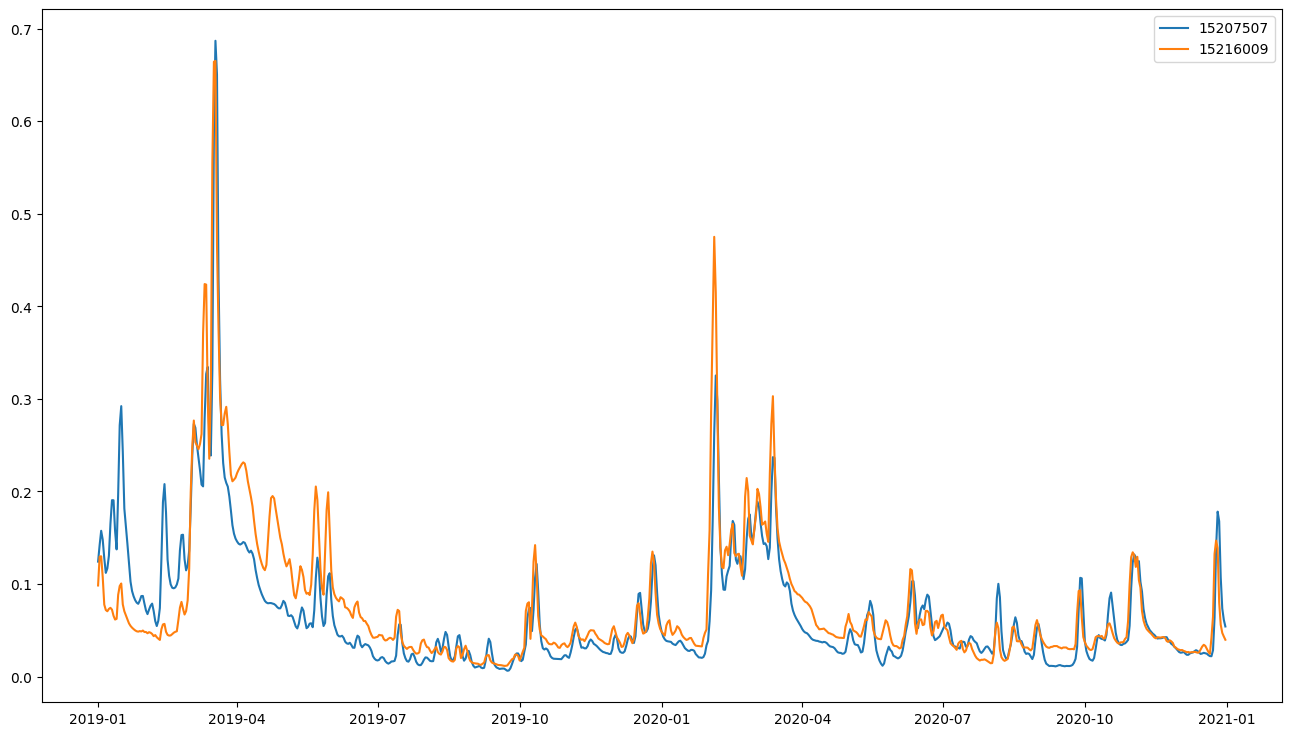

In [86]:
plt.figure(figsize=(16, 9))


plt.plot(scaled_df['15207507']['2019':'2020'], label='15207507')
# plt.plot(scaled_df['15205501']['2019':'2021'], label='15205501')
plt.plot(scaled_df['15216009']['2019':'2020'], label='15216009')
plt.legend()


In [135]:
stream_gauges = pd.read_csv(os.path.join('..','data','processed','stream_flow_stations_ETRS89.csv'),sep = ';')
stream_gauges.head()

,measurement_location,name,lon,lat
0,15202300,Chamerau,772999,5454387
1,15205501,Kienhof,754654,5454455
2,15207507,Marienthal,731151,5457076
3,15210206,Zwiesel,808629,5437159
4,15212008,Teisnach,792241,5439862


In [136]:
def calculate_distance(lon,lat, ref_point):
    easting_diff = lon - ref_point[0]
    northing_diff = lat - ref_point[1]
    distance_m = np.sqrt(easting_diff**2 + northing_diff**2)
    distance_km = distance_m / 1000  # Convert meters to kilometers
    return distance_km

In [138]:
ref_point = stream_gauges.loc[stream_gauges['measurement_location'] == 15207507][['lon','lat']].values[0]
stream_gauges['distance_to_ref'] = stream_gauges.apply(lambda row : calculate_distance(row['lon'],row['lat'],ref_point),axis = 1)
stream_gauges = stream_gauges.sort_values('distance_to_ref')
stream_gauges

,measurement_location,name,lon,lat,distance_to_ref
2,15207507,Marienthal,731151,5457076,0.000000
1,15205501,Kienhof,754654,5454455,23.648692
17,15246000,Kothmaissling,771733,5460893,40.761112
0,15202300,Chamerau,772999,5454387,41.934304
16,15243001,Furth im Wald,778880,5468131,48.992555
12,15228008,Koetzting,780850,5453366,49.837282
15,15242508,Drachensee Speicherabfluss,780824,5470072,51.344941
14,15242304,Eschlkam,783449,5468105,53.448289
19,15247501,Oesbuehl,783028,5470376,53.554768
18,15247002,Leming,784900,5466230,54.522938


In [151]:
stream_gauges.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 2 to 8
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   measurement_location  20 non-null     int64  
 1   name                  20 non-null     object 
 2   lon                   20 non-null     int64  
 3   lat                   20 non-null     int64  
 4   distance_to_ref       20 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 960.0+ bytes


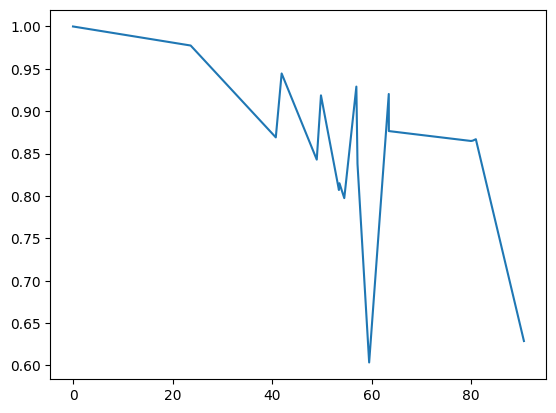

In [163]:
corr_matrix_with_15207507 = rolling_df.corr().loc[:, ['15207507']].reset_index()
corr_matrix_with_15207507['measurement_location'] = corr_matrix_with_15207507['measurement_location'].astype(pd.Int64Dtype())
corr_sorted = corr_matrix_with_15207507.merge(stream_gauges,on ='measurement_location')
corr_sorted = corr_sorted.rename(columns={'15207507' : 'correlation'})
plt.plot(corr_sorted.sort_values('distance_to_ref')['distance_to_ref'].values,corr_sorted.sort_values('distance_to_ref')['correlation'].values)

In [164]:
corr_sorted.sort_values('distance_to_ref')

,measurement_location,correlation,name,lon,lat,distance_to_ref
2,15207507,1.000000,Marienthal,731151,5457076,0.000000
1,15205501,0.977523,Kienhof,754654,5454455,23.648692
16,15246000,0.869111,Kothmaissling,771733,5460893,40.761112
0,15202300,0.944552,Chamerau,772999,5454387,41.934304
15,15243001,0.842857,Furth im Wald,778880,5468131,48.992555
12,15228008,0.918695,Koetzting,780850,5453366,49.837282
14,15242304,0.807030,Eschlkam,783449,5468105,53.448289
18,15247501,0.815019,Oesbuehl,783028,5470376,53.554768
17,15247002,0.797412,Leming,784900,5466230,54.522938
5,15212700,0.929058,Saegmuehle,786279,5442774,56.952995


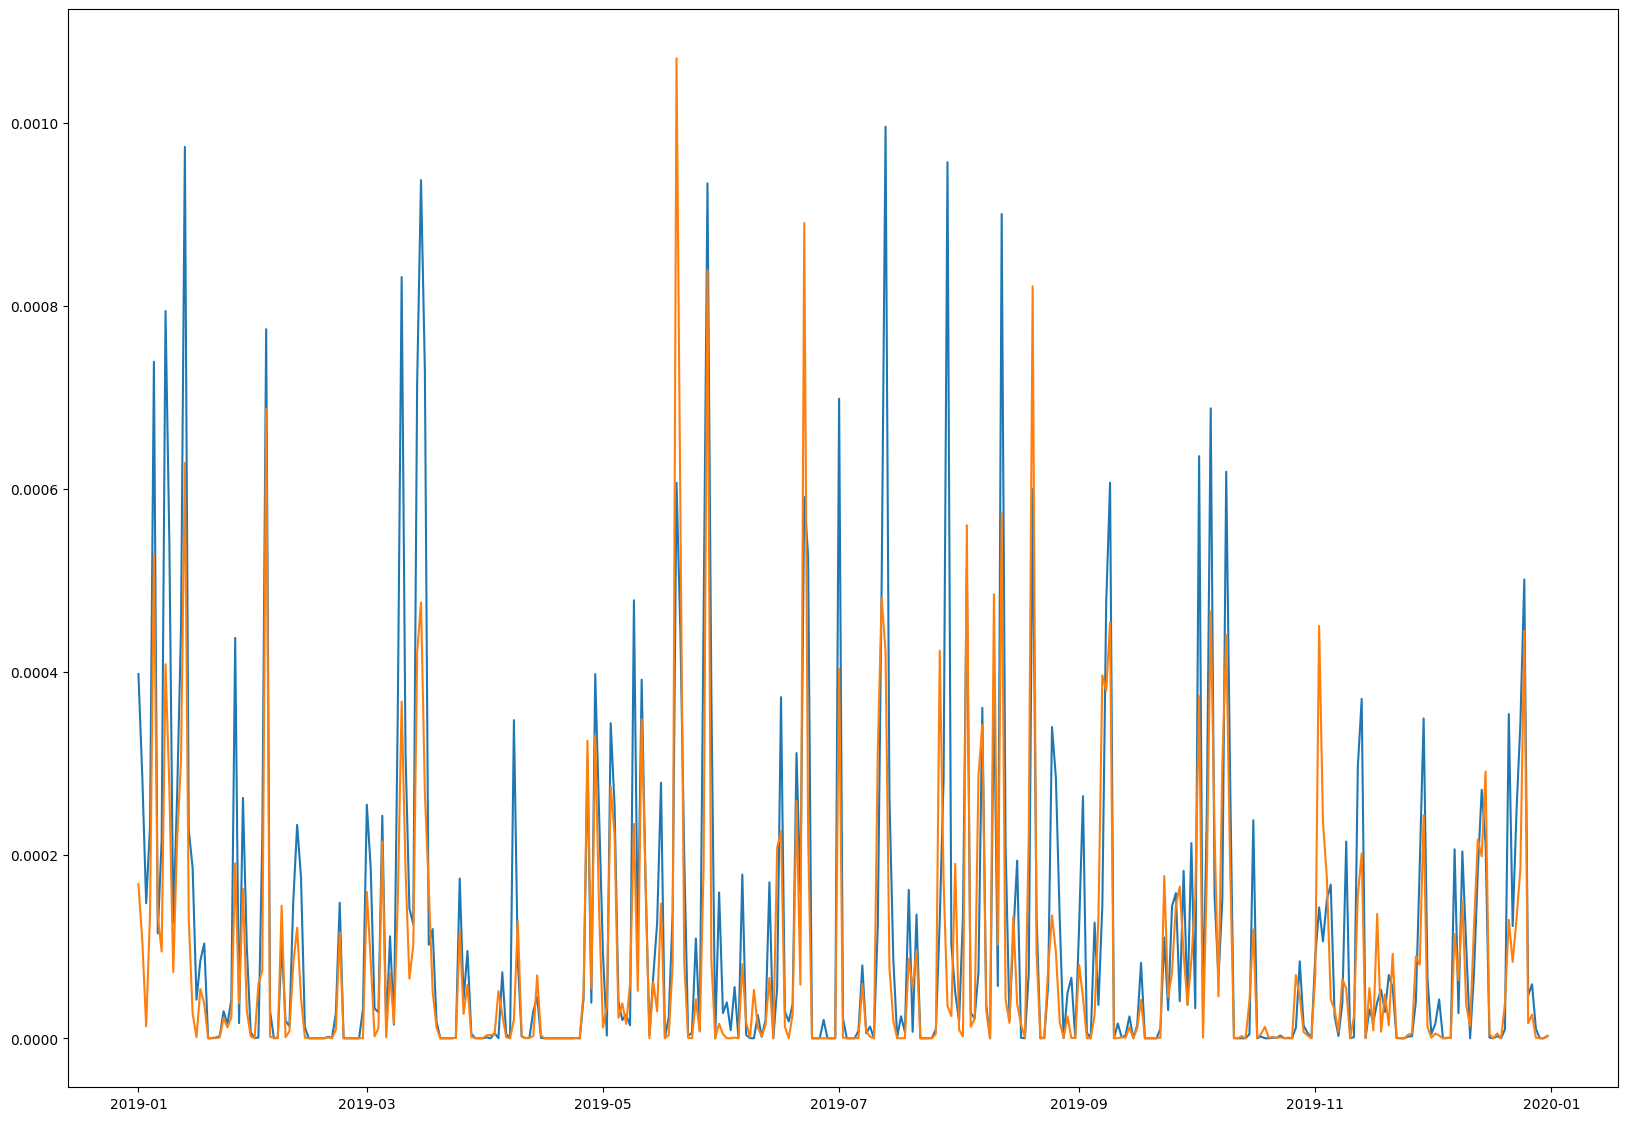

In [124]:
plt.figure(figsize=(20, 14))
plt.plot(meteo_df['tp_8800']['2019'])
plt.plot(meteo_df['tp_8120']['2019'])

<Axes: >

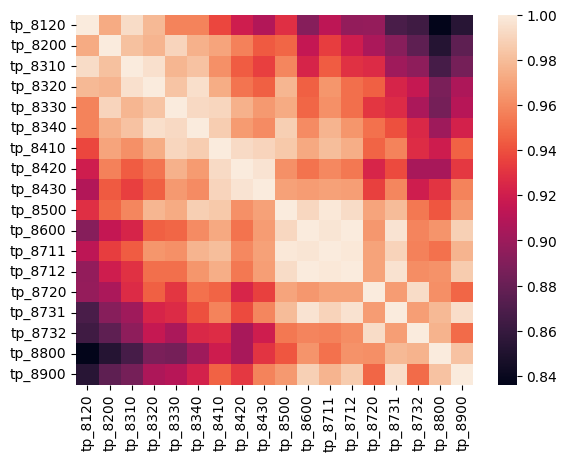

In [130]:
sns.heatmap(meteo_df[list(meteo_df.columns[-18:])].corr())